In [12]:
import pandas as pd
import re

# Đọc dữ liệu
df = pd.read_csv('results/bazaar_results_sorted.csv')

# Hàm tách xxx và vv từ instance_name
def extract_xxx_vv(name):
    match = re.match(r'bazaar-(\d+)-(\d+)\.txt', name)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

# Tạo 2 cột mới: xxx và vv
df[['xxx', 'vv']] = df['instance_name'].apply(lambda name: pd.Series(extract_xxx_vv(name)))

# Sắp xếp theo xxx rồi vv
df_sorted = df.sort_values(by=['xxx', 'vv']).reset_index(drop=True)

#Xoá cột phụ nếu muốn (hoặc giữ lại để kiểm tra)
df_sorted = df_sorted.drop(columns=['xxx', 'vv'])

# Ghi lại nếu cần
df_sorted.to_csv('results/bazaar_results_sorted.csv', index=False)



Dữ liệu lợi nhuận trung bình đã nhóm theo mốc và thuật toán:
   n_items_types Algorithm   Total_Value
0             10       EDA   1251.760000
1             10     GRASP    979.680000
2             20       EDA   5306.384615
3             20     GRASP   3713.846154
4             30       EDA  10525.250000

Đã lưu biểu đồ lợi nhuận trung bình vào 'line_chart_milestones_average_profit.png'


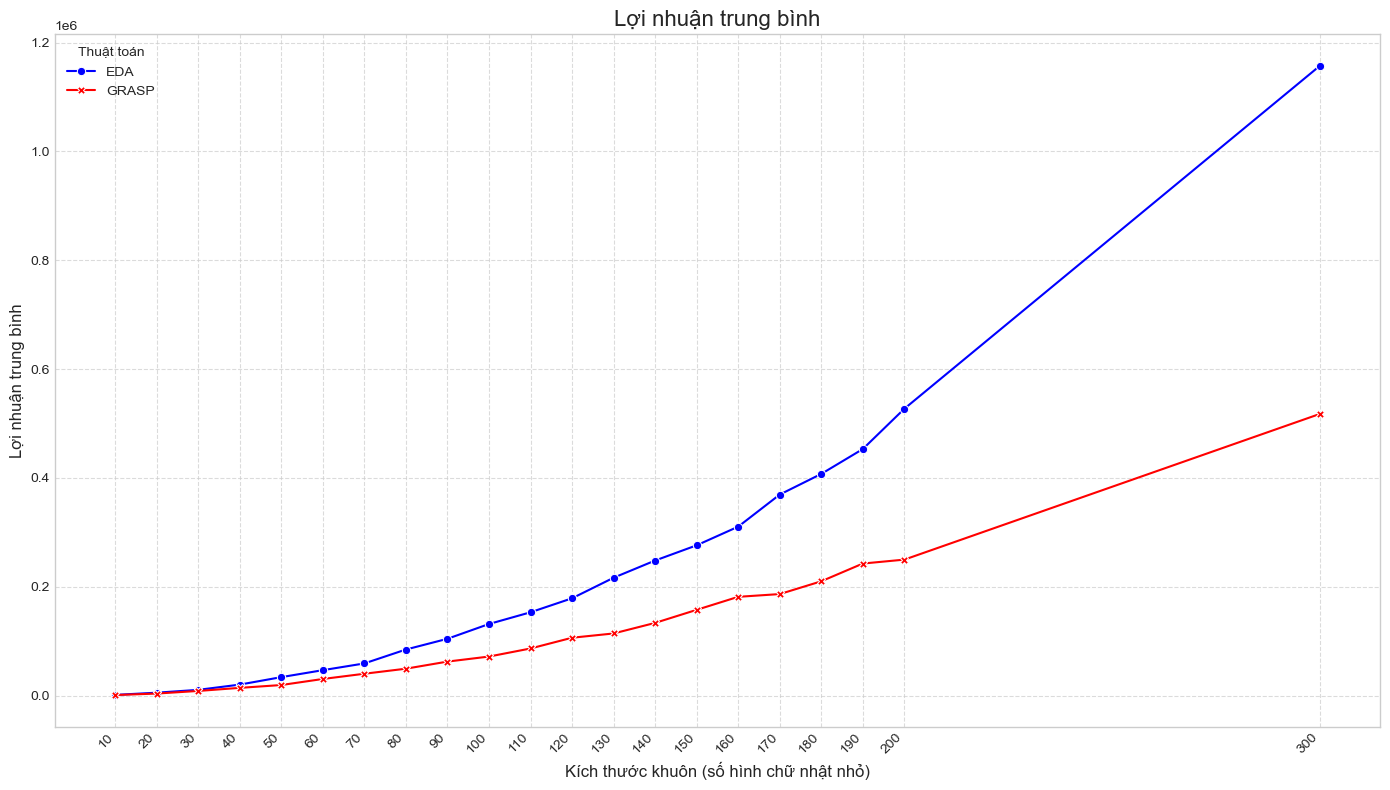

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # For potential string parsing if n_items_types wasn't available

# Load the dataset
try:
    # Đã sửa đường dẫn tệp ở đây
    df = pd.read_csv("results/bazaar_results_sorted.csv")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'bazaar_results_sorted.csv'. Vui lòng đảm bảo tên tệp chính xác và tệp nằm trong đường dẫn có thể truy cập.")
    exit()

# The user wants milestones based on "bazaar-xxx-*.txt".
# From previous inspection, 'n_items_types' column corresponds to 'xxx'.
value_to_average = 'Total_Value' # Đây chính là lợi nhuận
milestone_column = 'n_items_types'
algorithm_column = 'Algorithm'

# Check if necessary columns exist
required_columns = [milestone_column, algorithm_column, value_to_average]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Lỗi: Thiếu các cột cần thiết: {', '.join(missing_columns)}.")
    print(f"Vui lòng đảm bảo tệp CSV chứa các cột: {milestone_column}, {algorithm_column}, và {value_to_average}.")
    exit()

# Filter for EDA and GRASP algorithms if there are others
df_filtered = df[df[algorithm_column].isin(['EDA', 'GRASP'])].copy()

if df_filtered.empty:
    print(f"Không tìm thấy dữ liệu cho thuật toán EDA hoặc GRASP trong cột '{algorithm_column}'. Đang thoát.")
    exit()

# Group data by milestone (n_items_types) and Algorithm, then calculate the mean of 'Total_Value'
df_grouped_milestones = df_filtered.groupby([milestone_column, algorithm_column])[value_to_average].mean().reset_index()

# Sort by milestone for proper line chart plotting
df_grouped_milestones = df_grouped_milestones.sort_values(by=milestone_column)

print("\nDữ liệu lợi nhuận trung bình đã nhóm theo mốc và thuật toán:")
print(df_grouped_milestones.head())

# Create the line chart
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Define a color palette
palette = {'EDA': 'blue', 'GRASP': 'red'}

sns.lineplot(
    x=milestone_column,
    y=value_to_average,
    hue=algorithm_column,
    style=algorithm_column, # Optional: different line styles
    markers=True, # Add markers to data points
    dashes=False, # Use solid lines
    palette=palette,
    hue_order=['EDA', 'GRASP'], # Ensure consistent legend order
    data=df_grouped_milestones
)

# Đã cập nhật tiêu đề biểu đồ
plt.title(f'Lợi nhuận trung bình', fontsize=16)
plt.xlabel(f'Kích thước khuôn (số hình chữ nhật nhỏ)', fontsize=12)
plt.ylabel(f'Lợi nhuận trung bình', fontsize=12)
plt.legend(title='Thuật toán', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Improve x-axis ticks if there are many milestones
unique_milestones = sorted(df_grouped_milestones[milestone_column].unique())
if len(unique_milestones) > 15: # Adjust this threshold as needed
    step = max(1, len(unique_milestones) // 15)
    plt.xticks(unique_milestones[::step], rotation=45, ha='right')
else:
    plt.xticks(unique_milestones, rotation=45, ha='right')


plt.tight_layout()
plt.savefig('line_chart_milestones_average_profit.png')
print("\nĐã lưu biểu đồ lợi nhuận trung bình vào 'line_chart_milestones_average_profit.png'")
plt.show()

Đã lưu biểu đồ thời gian thực thi vào 'milestone_execution_time_line_chart.png'


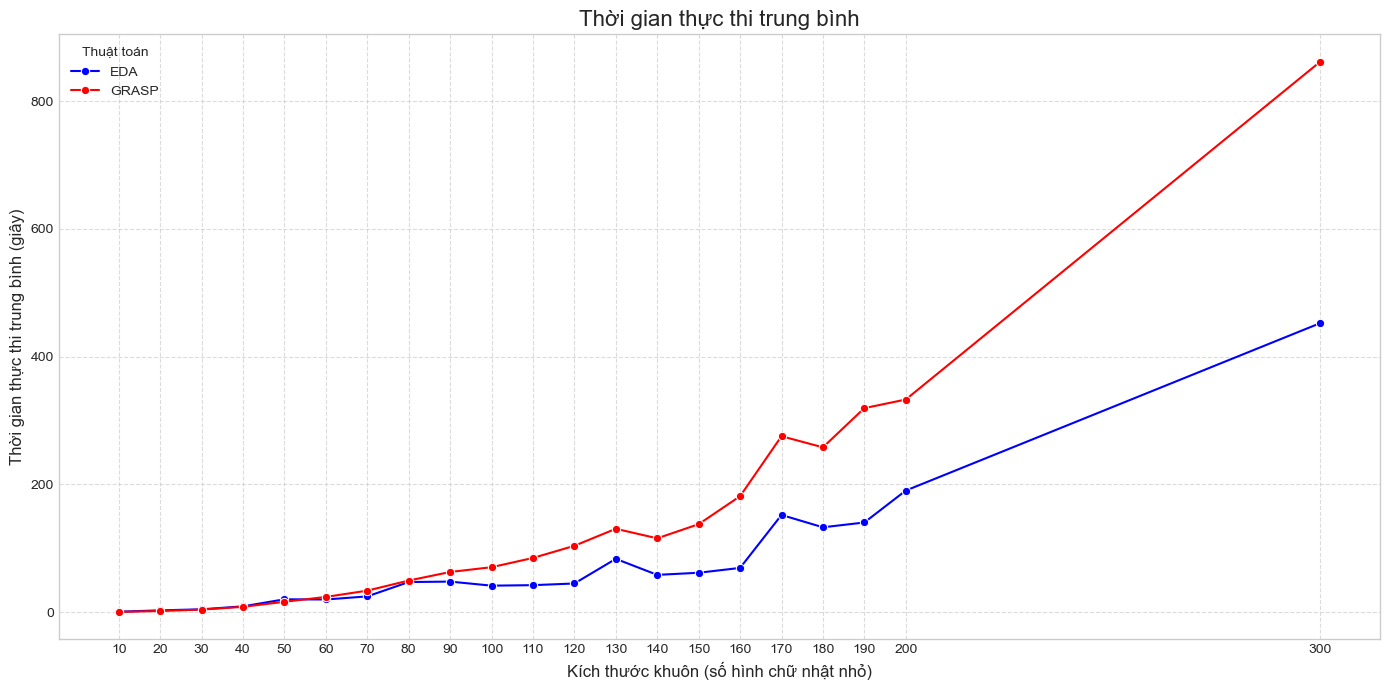

Đã lưu biểu đồ tiêu hao bộ nhớ vào 'milestone_peak_memory_line_chart.png'


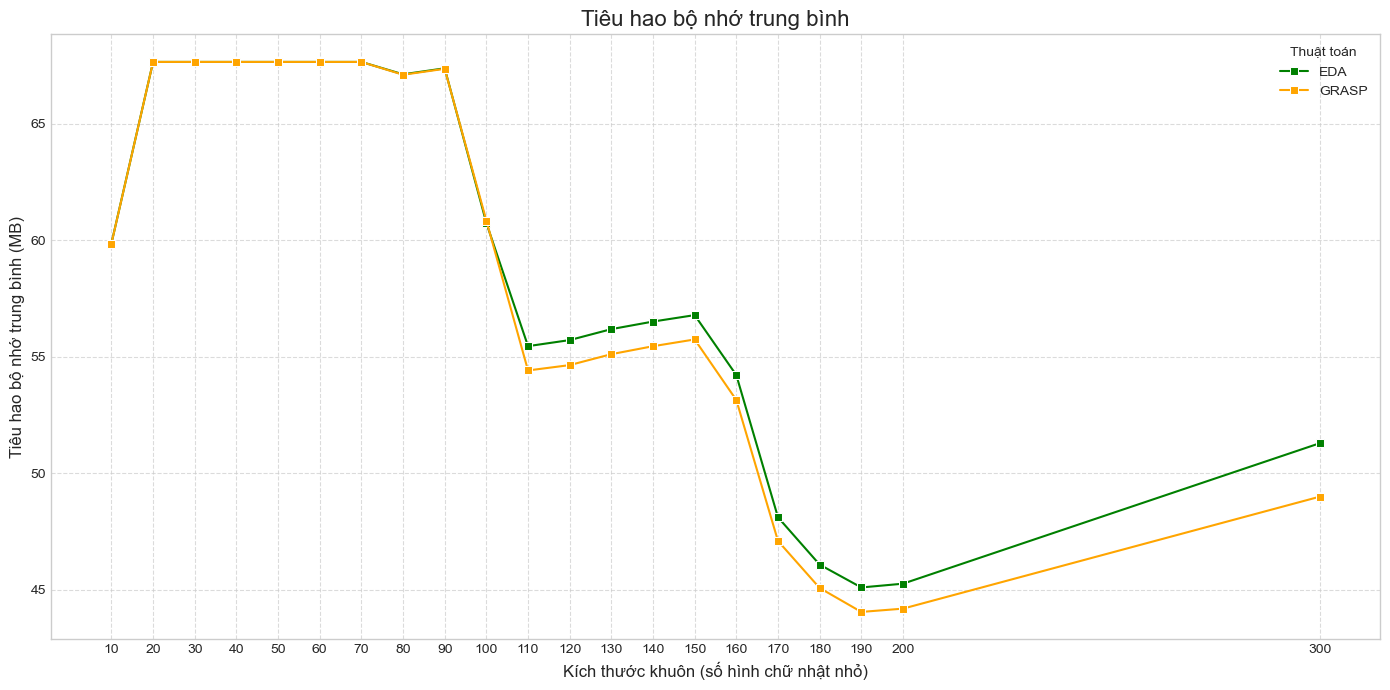


Hoàn thành vẽ biểu đồ!


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tải tập dữ liệu
try:
    df = pd.read_csv("results/bazaar_results_sorted.csv")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'bazaar_results_sorted.csv'. Vui lòng đảm bảo tên tệp chính xác.")
    # exit() # Bỏ comment nếu muốn thoát chương trình khi không tìm thấy tệp

# Kiểm tra xem df đã được tải thành công chưa (nếu không thoát ở trên)
if 'df' not in locals():
    print("Tập dữ liệu chưa được tải. Kết thúc chương trình.")
    exit()

# --- Xác minh các cột cần thiết ---
required_columns = ['n_items_types', 'execution_time_s', 'peak_memory_mb', 'Algorithm']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"Lỗi: Thiếu các cột bắt buộc sau: {', '.join(missing_cols)}")
    # exit() # Bỏ comment nếu muốn thoát

# Lọc cho thuật toán EDA và GRASP
df_filtered = df[df['Algorithm'].isin(['EDA', 'GRASP'])].copy()

if df_filtered.empty:
    print("Không tìm thấy dữ liệu cho thuật toán EDA hoặc GRASP.")
    # exit() # Bỏ comment nếu muốn thoát

# 1. Biểu đồ đường cho Thời gian thực thi trung bình

# Nhóm theo 'n_items_types' (mốc) và 'Algorithm', sau đó tính trung bình 'execution_time_s'
milestone_time = df_filtered.groupby(['n_items_types', 'Algorithm'])['execution_time_s'].mean().reset_index()

# Sắp xếp giá trị theo mốc để thứ tự vẽ đường đúng
milestone_time_sorted = milestone_time.sort_values(by='n_items_types')

plt.figure(figsize=(14, 7))
sns.lineplot(data=milestone_time_sorted, x='n_items_types', y='execution_time_s', hue='Algorithm', marker='o', palette={'EDA': 'blue', 'GRASP': 'red'})
plt.title('Thời gian thực thi trung bình', fontsize=16)
plt.xlabel('Kích thước khuôn (số hình chữ nhật nhỏ)', fontsize=12)
plt.ylabel('Thời gian thực thi trung bình (giây)', fontsize=12)
plt.legend(title='Thuật toán')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(sorted(milestone_time_sorted['n_items_types'].unique())) # Đảm bảo tất cả các mốc được hiển thị
plt.tight_layout()
plt.savefig('milestone_execution_time_line_chart.png')
print("Đã lưu biểu đồ thời gian thực thi vào 'milestone_execution_time_line_chart.png'")
plt.show()


# 2. Biểu đồ đường cho Tiêu hao bộ nhớ trung bình

# Nhóm theo 'n_items_types' (mốc) và 'Algorithm', sau đó tính trung bình 'peak_memory_mb'
milestone_memory = df_filtered.groupby(['n_items_types', 'Algorithm'])['peak_memory_mb'].mean().reset_index()

# Sắp xếp giá trị theo mốc
milestone_memory_sorted = milestone_memory.sort_values(by='n_items_types')

plt.figure(figsize=(14, 7))
sns.lineplot(data=milestone_memory_sorted, x='n_items_types', y='peak_memory_mb', hue='Algorithm', marker='s', palette={'EDA': 'green', 'GRASP': 'orange'}) # 's' là square marker
plt.title('Tiêu hao bộ nhớ trung bình', fontsize=16)
plt.xlabel('Kích thước khuôn (số hình chữ nhật nhỏ)', fontsize=12)
plt.ylabel('Tiêu hao bộ nhớ trung bình (MB)', fontsize=12)
plt.legend(title='Thuật toán')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(sorted(milestone_memory_sorted['n_items_types'].unique())) # Đảm bảo tất cả các mốc được hiển thị
plt.tight_layout()
plt.savefig('milestone_peak_memory_line_chart.png')
print("Đã lưu biểu đồ tiêu hao bộ nhớ vào 'milestone_peak_memory_line_chart.png'")
plt.show()

print("\nHoàn thành vẽ biểu đồ!")

In [2]:
import pandas as pd
import io

# The user has already uploaded "G2KP_results.csv" in a previous turn.
# For the purpose of this tool execution, we'll define the content directly
# based on the file content if it were read.
# In a real scenario with file access, you would use:
# file_path = "G2KP_results.csv" # Or the actual path to the uploaded file
# df = pd.read_csv(file_path)

csv_content = """instance_name,Algorithm,n_items_types,Bin_Length,Bin_Width,Total_Value,Num_Placed_Pieces,execution_time_s,peak_memory_mb
CHL1.txt,GRASP,30,132,100,7171,13,5.435468499956187,59.8046875
CHL1.txt,EDA,30,132,100,7854,8,2.951108600012958,60.65234375
CW1.txt,GRASP,25,125,105,4933,10,2.1389733999967575,60.65234375
CW1.txt,EDA,25,125,105,6086,8,2.0758466999977827,60.6875
CW2.txt,GRASP,35,145,165,3880,8,3.0607343000010587,60.6875
CW2.txt,EDA,35,145,165,4890,7,1.877370800008066,60.77734375
CW3.txt,GRASP,40,267,207,4454,8,4.388378600007854,60.77734375
CW3.txt,EDA,40,267,207,5693,5,2.989224999968428,61.81640625
Hchl2.txt,GRASP,35,130,130,8445,16,6.247821199998725,61.875
Hchl2.txt,EDA,35,130,130,9148,7,3.363808900001459,61.8828125
STS4.txt,GRASP,20,99,99,8138,15,2.085872100025881,61.88671875
STS4.txt,EDA,20,99,99,9411,7,1.9042064999812283,61.89453125
okp1.txt,GRASP,15,100,100,25205,11,0.8590138000436127,61.8984375
okp1.txt,EDA,15,100,100,27360,8,2.4684589999960735,61.8984375
okp2.txt,GRASP,30,100,100,17670,8,1.9996328999986872,61.8984375
okp2.txt,EDA,30,100,100,21401,9,1.6473350999876857,61.8984375
okp3.txt,GRASP,30,100,100,18887,7,2.032372799993027,61.8984375
okp3.txt,EDA,30,100,100,22745,8,1.3460052000009455,61.8984375
okp4.txt,GRASP,33,100,100,26691,11,3.4310648000100628,61.8984375
okp4.txt,EDA,33,100,100,35629,10,2.62226340000052,61.8984375
okp5.txt,GRASP,29,100,100,46361,33,2.8592663000454195,61.8984375
okp5.txt,EDA,29,100,100,26292,7,4.07947499997681,62.15234375
"""

# Read the CSV content into a pandas DataFrame
df = pd.read_csv(io.StringIO(csv_content))

# Ensure 'n_items_types' is numeric for correct sorting
df['n_items_types'] = pd.to_numeric(df['n_items_types'], errors='coerce')

# Sort the DataFrame by the 'n_items_types' column
# If two instances have the same 'n_items_types', you might want a secondary sort key,
# for example, 'instance_name' or 'Algorithm'.
# Here, we sort primarily by 'n_items_types' and then by 'instance_name' as a tie-breaker.
df_sorted = df.sort_values(by=['n_items_types', 'instance_name', 'Algorithm'], ascending=[True, True, True])

# Define the name for the new sorted CSV file
output_filename = "results/G2KP_results_sorted.csv"

# Save the sorted DataFrame to a new CSV file
df_sorted.to_csv(output_filename, index=False)

print(f"File đã được sắp xếp theo 'n_items_types' và lưu vào '{output_filename}'")
print("\nNội dung 5 dòng đầu của file đã sắp xếp:")
print(df_sorted.head().to_string())

File đã được sắp xếp theo 'n_items_types' và lưu vào 'results/G2KP_results_sorted.csv'

Nội dung 5 dòng đầu của file đã sắp xếp:
   instance_name Algorithm  n_items_types  Bin_Length  Bin_Width  Total_Value  Num_Placed_Pieces  execution_time_s  peak_memory_mb
13      okp1.txt       EDA             15         100        100        27360                  8          2.468459       61.898438
12      okp1.txt     GRASP             15         100        100        25205                 11          0.859014       61.898438
11      STS4.txt       EDA             20          99         99         9411                  7          1.904206       61.894531
10      STS4.txt     GRASP             20          99         99         8138                 15          2.085872       61.886719
3        CW1.txt       EDA             25         125        105         6086                  8          2.075847       60.687500


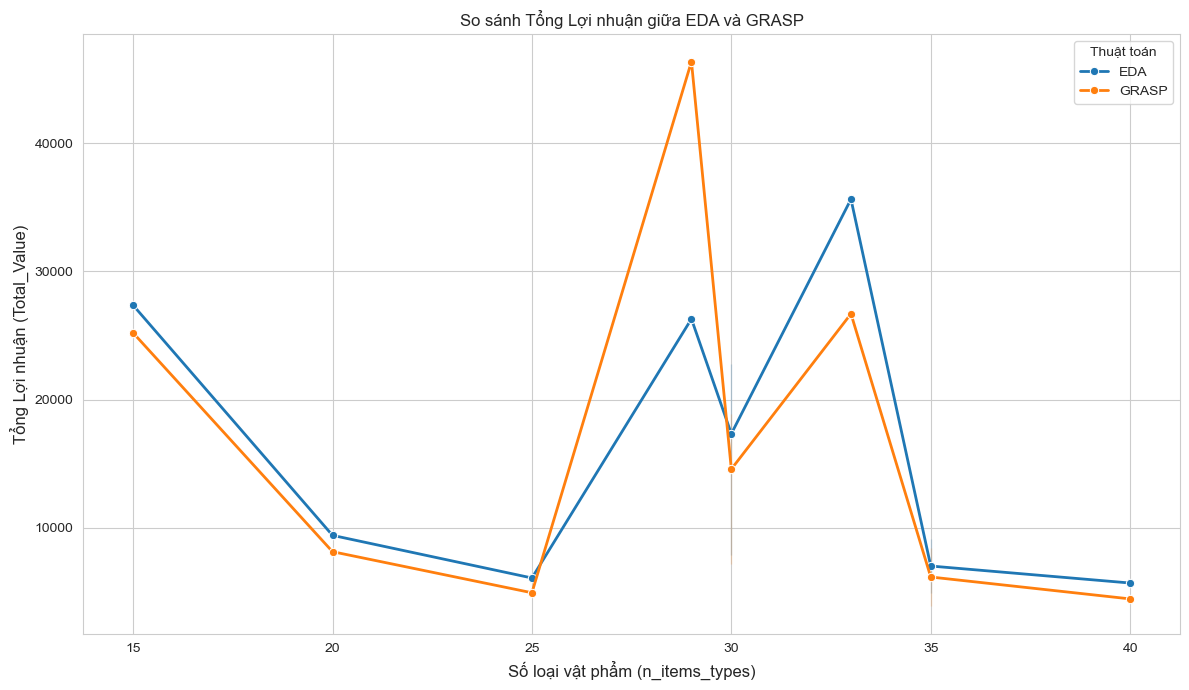

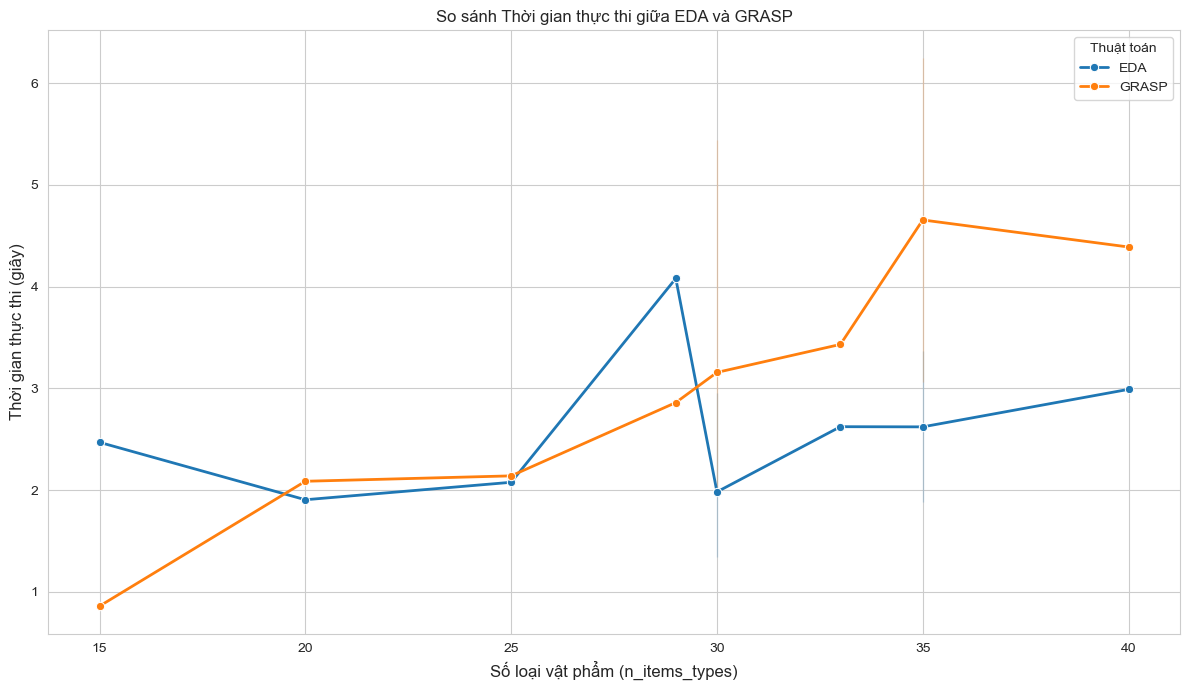

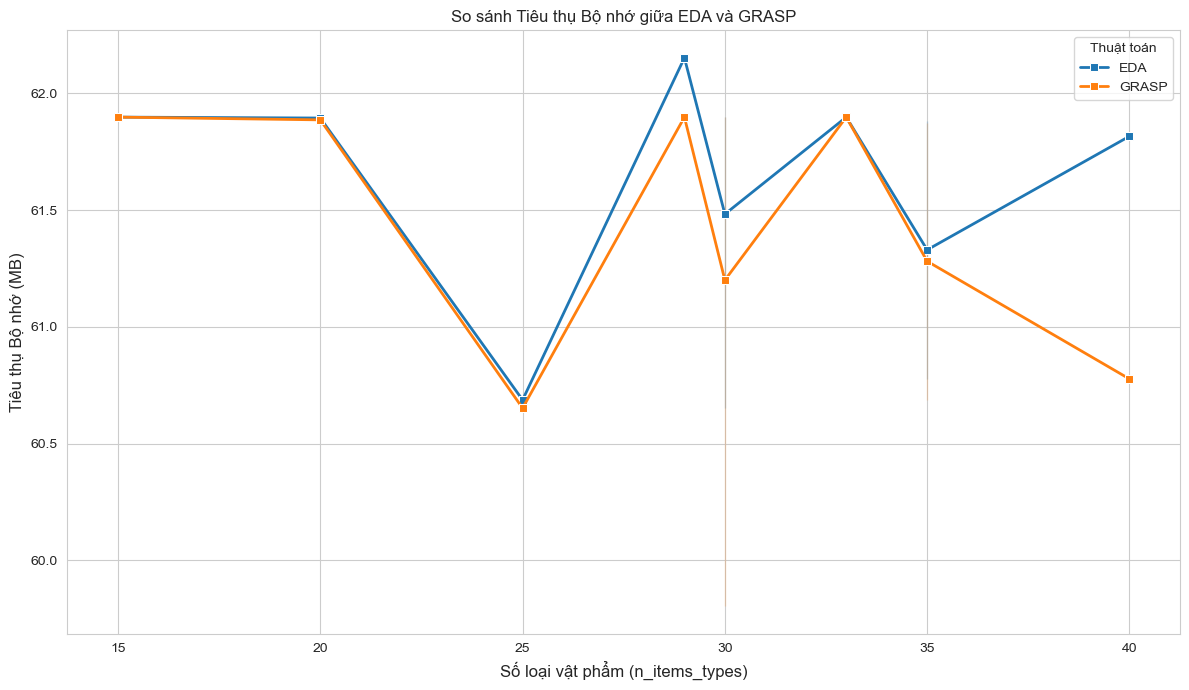

Đã tạo và lưu 3 biểu đồ: total_profit_comparison.png, execution_time_comparison.png, peak_memory_comparison.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
try:
    df = pd.read_csv("results/G2KP_results_sorted.csv") # [cite: 1]
except FileNotFoundError:
    print("Error: G2KP_results.csv not found. Make sure the file is in the same directory as the script.")
    exit()

# Convert relevant columns to numeric, coercing errors to NaN
df['Total_Value'] = pd.to_numeric(df['Total_Value'], errors='coerce')
df['Num_Placed_Pieces'] = pd.to_numeric(df['Num_Placed_Pieces'], errors='coerce')
df['execution_time_s'] = pd.to_numeric(df['execution_time_s'], errors='coerce')
df['peak_memory_mb'] = pd.to_numeric(df['peak_memory_mb'], errors='coerce')
df['n_items_types'] = pd.to_numeric(df['n_items_types'], errors='coerce') # [cite: 1]

# Drop rows where conversion to numeric failed for key metrics
df.dropna(subset=['Total_Value', 'execution_time_s', 'peak_memory_mb', 'n_items_types'], inplace=True)

# Sort data by n_items_types for consistent plotting
df.sort_values(by='n_items_types', inplace=True) # [cite: 1]

# Set a professional style for the plots
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial' # Or another professional font like 'Times New Roman'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14

# --- 1. Biểu đồ Tổng Lợi nhuận (Total Value) ---
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='n_items_types', y='Total_Value', hue='Algorithm', marker='o', linewidth=2) # [cite: 1]
plt.title('So sánh Tổng Lợi nhuận giữa EDA và GRASP')
plt.xlabel('Số loại vật phẩm (n_items_types)')
plt.ylabel('Tổng Lợi nhuận (Total_Value)')
plt.legend(title='Thuật toán')
plt.tight_layout()
plt.savefig("total_profit_comparison.png")
plt.show()

# --- 2. Biểu đồ Thời gian thực thi (Execution Time) ---
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='n_items_types', y='execution_time_s', hue='Algorithm', marker='o', linewidth=2) # [cite: 1]
plt.title('So sánh Thời gian thực thi giữa EDA và GRASP')
plt.xlabel('Số loại vật phẩm (n_items_types)')
plt.ylabel('Thời gian thực thi (giây)')
plt.legend(title='Thuật toán')
plt.tight_layout()
plt.savefig("execution_time_comparison.png")
plt.show()

# --- 3. Biểu đồ Tiêu thụ Bộ nhớ (Peak Memory) ---
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='n_items_types', y='peak_memory_mb', hue='Algorithm', marker='s', linewidth=2) # [cite: 1]
plt.title('So sánh Tiêu thụ Bộ nhớ giữa EDA và GRASP')
plt.xlabel('Số loại vật phẩm (n_items_types)')
plt.ylabel('Tiêu thụ Bộ nhớ (MB)')
plt.legend(title='Thuật toán')
plt.tight_layout()
plt.savefig("peak_memory_comparison.png")
plt.show()

print("Đã tạo và lưu 3 biểu đồ: total_profit_comparison.png, execution_time_comparison.png, peak_memory_comparison.png")

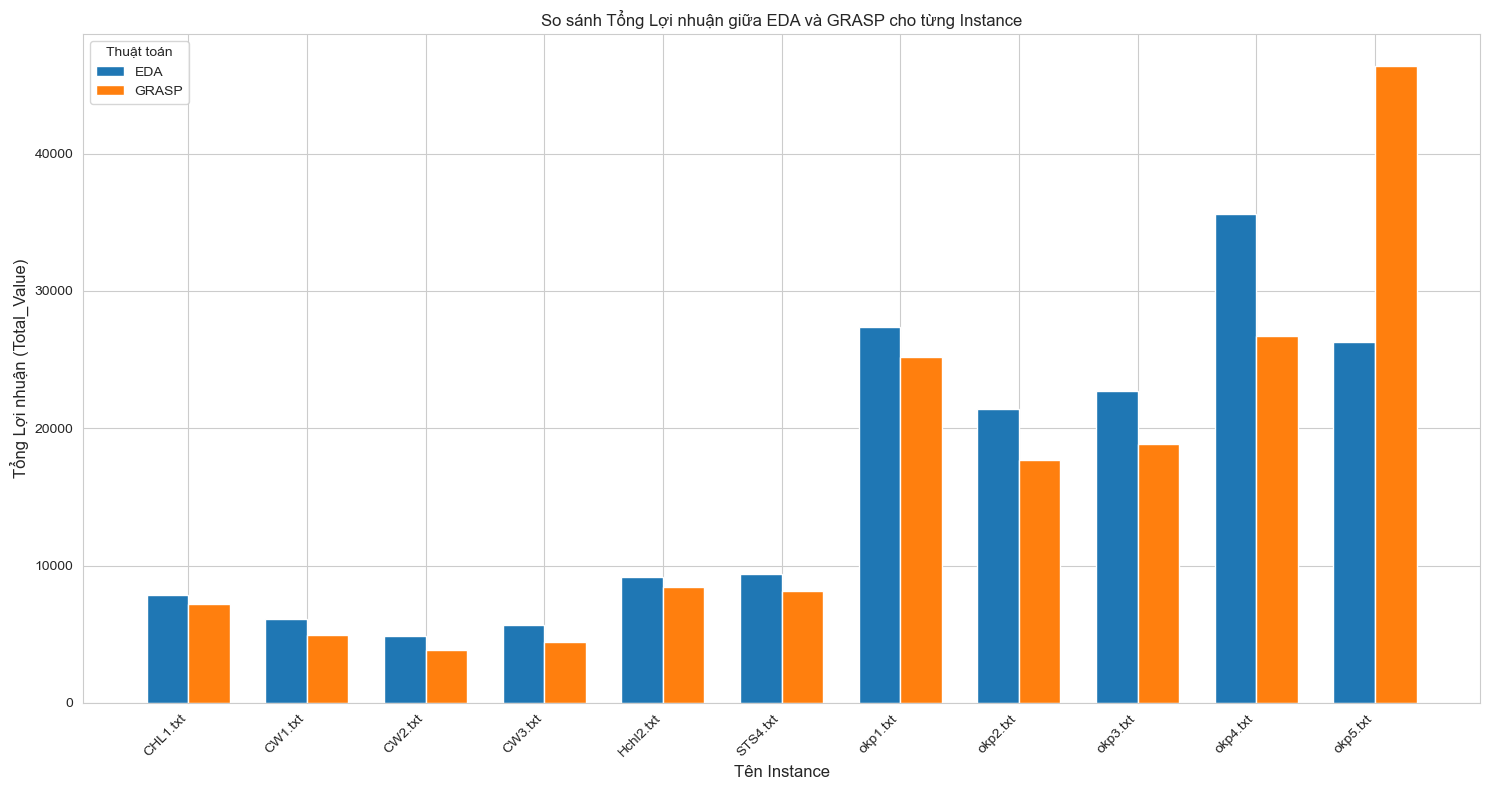

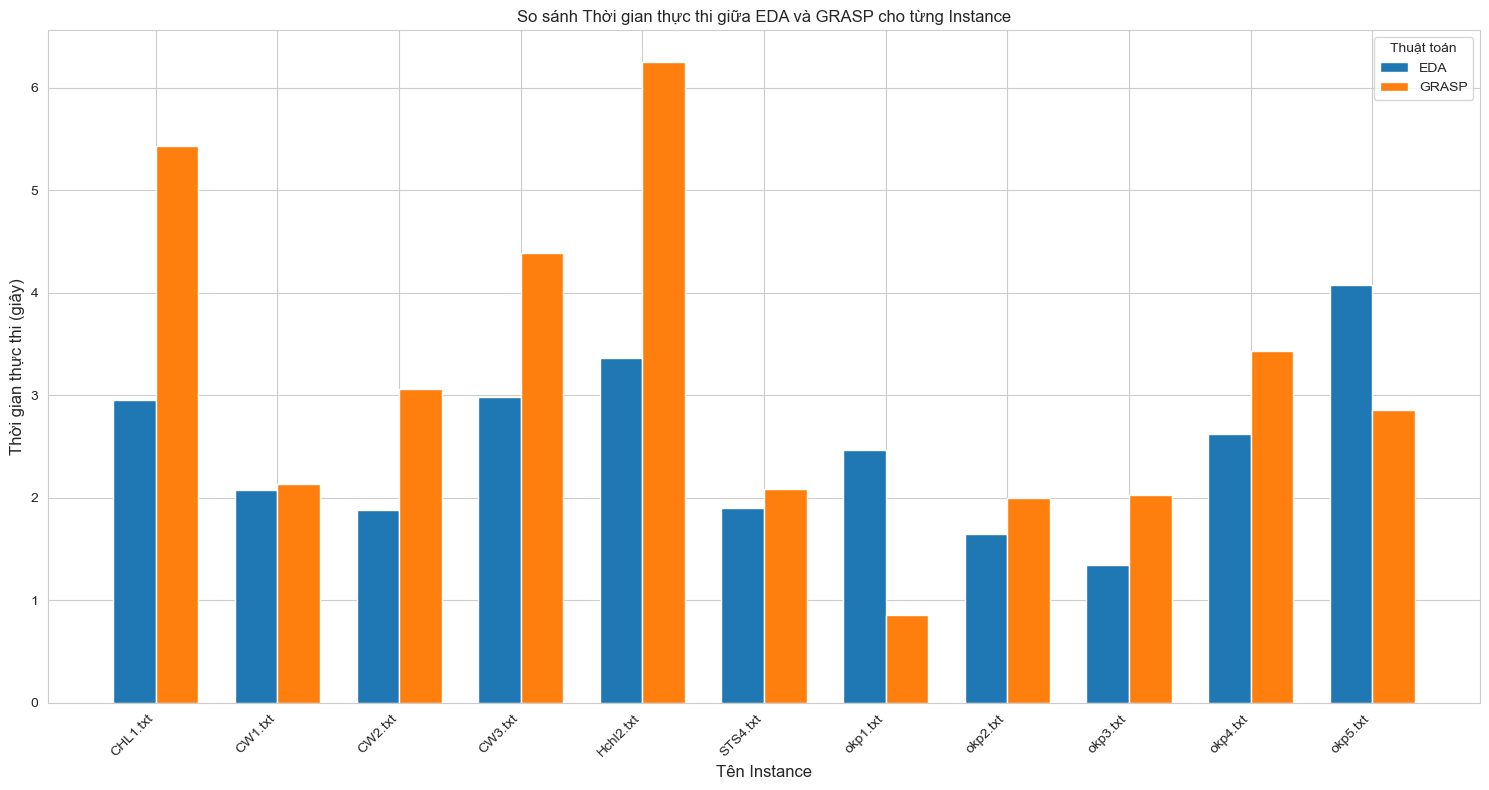

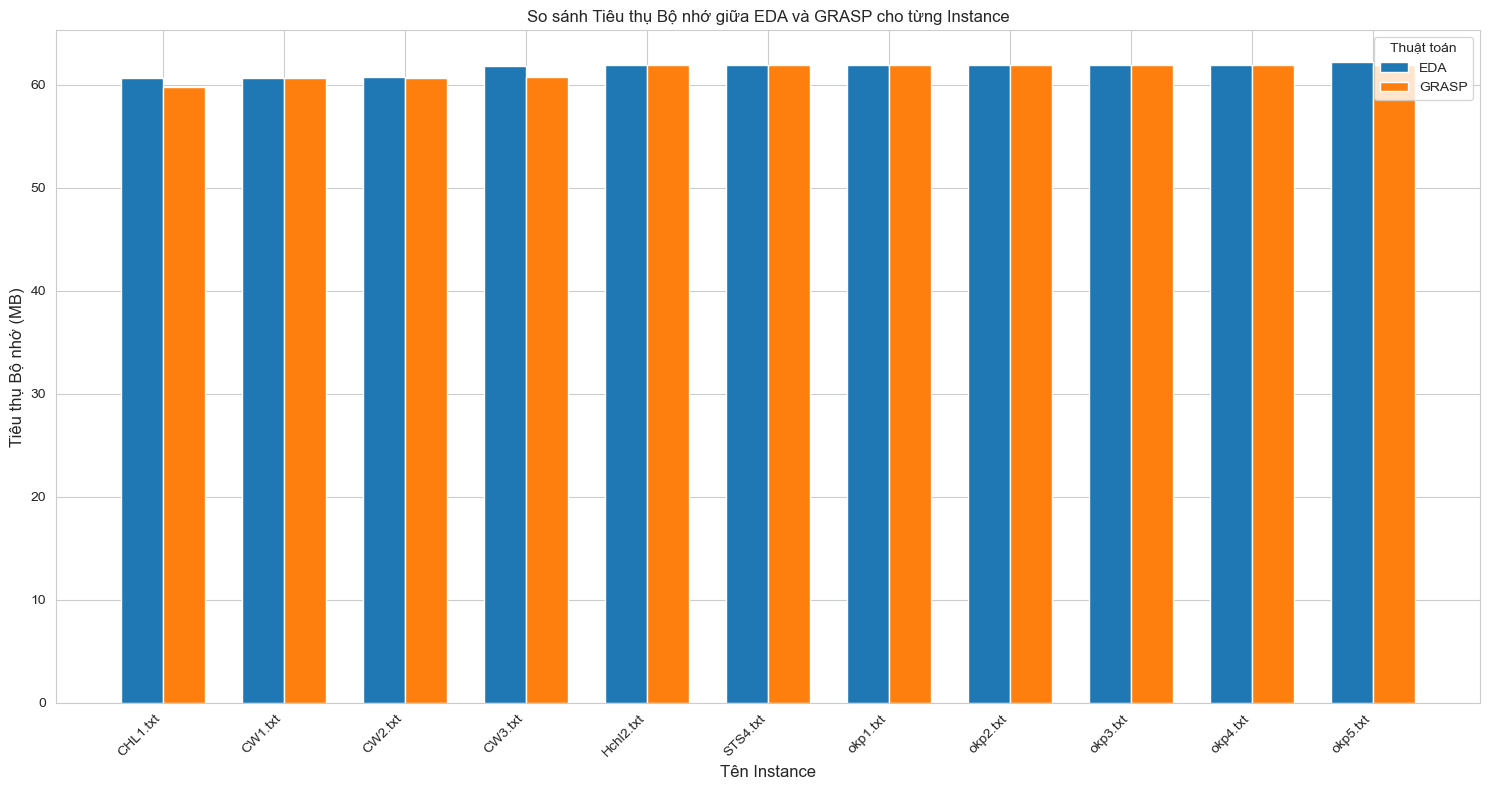

Đã tạo và lưu 3 biểu đồ cột: total_profit_barchart.png, execution_time_barchart.png, peak_memory_barchart.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Thêm numpy để tính toán vị trí cột

# Load the data from the CSV file
try:
    df = pd.read_csv("results/G2KP_results_sorted.csv") #
except FileNotFoundError:
    print("Lỗi: Không tìm thấy G2KP_results.csv. Hãy đảm bảo file ở cùng thư mục với script.")
    exit()

# Chuyển đổi kiểu dữ liệu và xử lý NaN
df['Total_Value'] = pd.to_numeric(df['Total_Value'], errors='coerce')
df['execution_time_s'] = pd.to_numeric(df['execution_time_s'], errors='coerce')
df['peak_memory_mb'] = pd.to_numeric(df['peak_memory_mb'], errors='coerce')
df['n_items_types'] = pd.to_numeric(df['n_items_types'], errors='coerce') #
df.dropna(subset=['Total_Value', 'execution_time_s', 'peak_memory_mb', 'instance_name', 'Algorithm', 'n_items_types'], inplace=True) # Thêm 'instance_name' và 'Algorithm'

# Sắp xếp dữ liệu để biểu đồ nhất quán hơn (ví dụ theo tên instance hoặc số loại vật phẩm)
# Ở đây, chúng ta có thể nhóm theo instance_name rồi đến Algorithm
df.sort_values(by=['instance_name', 'Algorithm'], inplace=True) #

# Thiết lập style cho biểu đồ
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14

# Danh sách các instance duy nhất để lặp qua
instance_names = df['instance_name'].unique()
algorithms = df['Algorithm'].unique()
n_algorithms = len(algorithms)
bar_width = 0.35  # Độ rộng của mỗi cột

# --- Hàm tiện ích để vẽ biểu đồ cột nhóm ---
def plot_grouped_bar_chart(metric_column, y_label, title, filename):
    plt.figure(figsize=(15, 8)) # Tăng kích thước để dễ đọc hơn với nhiều instance
    
    # Tạo vị trí cho các nhóm cột trên trục x
    index = np.arange(len(instance_names))

    for i, algo in enumerate(algorithms):
        # Lấy giá trị metric cho thuật toán hiện tại
        metric_values = df[df['Algorithm'] == algo].set_index('instance_name').reindex(instance_names)[metric_column].fillna(0) # fillna(0) nếu có instance thiếu dữ liệu cho 1 algo
        # Vẽ cột, dịch chuyển vị trí x để các cột của các thuật toán khác nhau không chồng lên nhau
        plt.bar(index + i * bar_width, metric_values, bar_width, label=algo)

    plt.xlabel('Tên Instance')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(index + bar_width * (n_algorithms - 1) / 2, instance_names, rotation=45, ha="right") # Căn chỉnh và xoay nhãn trục x
    plt.legend(title='Thuật toán')
    plt.tight_layout() # Tự động điều chỉnh
    plt.savefig(filename)
    plt.show()

# --- 1. Biểu đồ cột Tổng Lợi nhuận ---
plot_grouped_bar_chart(
    metric_column='Total_Value',
    y_label='Tổng Lợi nhuận (Total_Value)',
    title='So sánh Tổng Lợi nhuận giữa EDA và GRASP cho từng Instance',
    filename="total_profit_barchart.png"
)

# --- 2. Biểu đồ cột Thời gian thực thi ---
plot_grouped_bar_chart(
    metric_column='execution_time_s',
    y_label='Thời gian thực thi (giây)',
    title='So sánh Thời gian thực thi giữa EDA và GRASP cho từng Instance',
    filename="execution_time_barchart.png"
)

# --- 3. Biểu đồ cột Tiêu thụ Bộ nhớ ---
plot_grouped_bar_chart(
    metric_column='peak_memory_mb',
    y_label='Tiêu thụ Bộ nhớ (MB)',
    title='So sánh Tiêu thụ Bộ nhớ giữa EDA và GRASP cho từng Instance',
    filename="peak_memory_barchart.png"
)

print("Đã tạo và lưu 3 biểu đồ cột: total_profit_barchart.png, execution_time_barchart.png, peak_memory_barchart.png")